## Dogs vs. Cats image classification

This will be a convolutional neural network built with Keras using a subset of the dogs-vs-cats dataset from Kaggle.

In [1]:
import os, shutil

# assumes the train/test data is saved in
# ./datasets/cats_and_dogs/
original_dataset_dir = "datasets/cats_and_dogs/train"
base_dir = "datasets/cats_and_dogs_small"

train_dir = os.path.join(base_dir, 'train')
train_dogs_dir = os.path.join(train_dir, 'dogs')
train_cats_dir = os.path.join(train_dir, 'cats')

validation_dir = os.path.join(base_dir, 'validation')
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
validation_cats_dir = os.path.join(validation_dir, 'cats')

test_dir = os.path.join(base_dir, 'test')
test_dogs_dir = os.path.join(test_dir, 'dogs')
test_cats_dir = os.path.join(test_dir, 'cats')

In [2]:
def mkdir_if_not_exists(path):
    if not os.path.exists(path):
        os.mkdir(path)

#create the directories to contain the train/validation/test data
mkdir_if_not_exists(base_dir)
mkdir_if_not_exists(train_dir)
mkdir_if_not_exists(train_dogs_dir)
mkdir_if_not_exists(train_cats_dir)
mkdir_if_not_exists(validation_dir)
mkdir_if_not_exists(validation_dogs_dir)
mkdir_if_not_exists(validation_cats_dir)
mkdir_if_not_exists(test_dir)
mkdir_if_not_exists(test_dogs_dir)
mkdir_if_not_exists(test_cats_dir)

In [3]:
# copy 1000 training cat images to train_cats_dir
fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_cats_dir, fname)
    shutil.copyfile(src, dst)

In [4]:
# copy 500 validation cat images to validation_cats_dir
fnames = ['cat.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_cats_dir, fname)
    shutil.copyfile(src, dst)

In [5]:
# copy 500 test cat images to test_cats_dir
fnames = ['cat.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_cats_dir, fname)
    shutil.copyfile(src, dst)

In [6]:
# copy 1000 training dog images to train_dogs_dir
fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_dogs_dir, fname)
    shutil.copyfile(src, dst)

In [7]:
# copy 500 validation dog images to validation_dogs_dir
fnames = ['dog.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_dogs_dir, fname)
    shutil.copyfile(src, dst)

In [8]:
# copy 500 test dog images to test_dogs_dir
fnames = ['dog.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_dogs_dir, fname)
    shutil.copyfile(src, dst)

In [9]:
print('total training cat images:', len(os.listdir(train_cats_dir)))
print('total validation cat images:', len(os.listdir(validation_cats_dir)))
print('total test cat images:', len(os.listdir(test_cats_dir)))
print('total training dog images:', len(os.listdir(train_dogs_dir)))
print('total validation dog images:', len(os.listdir(validation_dogs_dir)))
print('total test dog images:', len(os.listdir(test_dogs_dir)))

total training cat images: 1001
total validation cat images: 501
total test cat images: 500
total training dog images: 1000
total validation dog images: 500
total test dog images: 500


In [10]:
from keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense
from keras.models import Model
from keras.optimizers import RMSprop

def get_model():
    inputs = Input((150, 150, 3))
    X = Conv2D(32, (3, 3), activation='relu')(inputs)
    X = MaxPooling2D((2, 2))(X)
    X = Conv2D(64, (3, 3), activation='relu')(X)
    X = MaxPooling2D((2, 2))(X)
    X = Conv2D(128, (3, 3), activation='relu')(X)
    X = MaxPooling2D((2, 2))(X)
    X = Conv2D(128, (3, 3), activation='relu')(X)
    X = MaxPooling2D((2, 2))(X)
    X = Flatten()(X)
    X = Dense(512, activation='relu')(X)
    outputs = Dense(1, activation='sigmoid')(X)
    
    model = Model(inputs=inputs, outputs=outputs)
    model.compile(
        loss='binary_crossentropy',
        optimizer=RMSprop(lr=1e-4),
        metrics=['acc']
    )
    
    return model

C:\Program Files\Anaconda3\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [11]:
model = get_model()
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 150, 150, 3)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)       0         
__________

In [12]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary'
)

validation_generator = train_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary'
)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [13]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=30,
    validation_data=validation_generator,
    validation_steps=50,
    verbose=0
)
model.save('datasets/cats_and_dogs_small/cats_and_dogs_small_1.h5')

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline

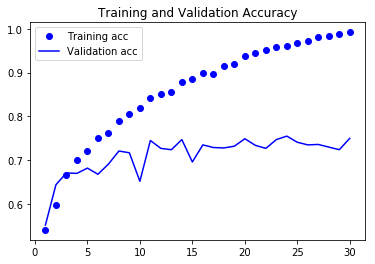

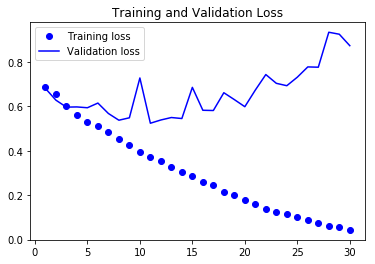

In [15]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.show()

### Data augmentation

The increasing validation loss paired with the decreasing training loss indicate that the model is overfitting the training data.  Instead of using the rest of the training images (which would make more sense), I'm going to use ImageDataGenerator to create more training examples

In [16]:
datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

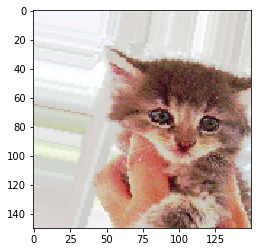

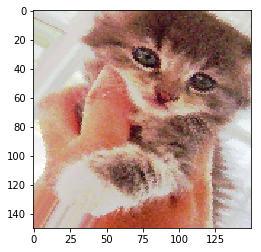

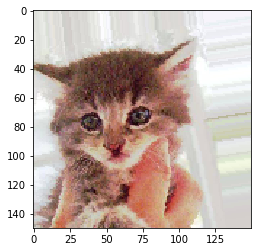

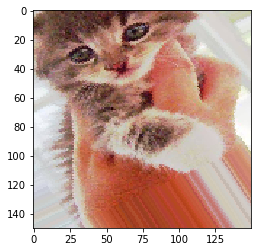

In [17]:
from keras.preprocessing import image

fnames = [os.path.join(train_cats_dir, fname) 
          for fname in os.listdir(train_cats_dir)]

img_path = fnames[3]

img = image.load_img(img_path, target_size=(150, 150))
x = image.img_to_array(img)
x = x.reshape((1,) + x.shape)

i = 0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break
        
plt.show()

In [18]:
from keras.layers import Dropout

def get_model_with_dropout():
    inputs = Input((150, 150, 3))
    X = Conv2D(32, (3, 3), activation='relu')(inputs)
    X = MaxPooling2D((2, 2))(X)
    X = Conv2D(64, (3, 3), activation='relu')(X)
    X = MaxPooling2D((2, 2))(X)
    X = Conv2D(128, (3, 3), activation='relu')(X)
    X = MaxPooling2D((2, 2))(X)
    X = Conv2D(128, (3, 3), activation='relu')(X)
    X = MaxPooling2D((2, 2))(X)
    X = Flatten()(X)
    X = Dropout(0,5)(X)
    X = Dense(512, activation='relu')(X)
    outputs = Dense(1, activation='sigmoid')(X)
    
    model = Model(inputs=inputs, outputs=outputs)
    model.compile(
        loss='binary_crossentropy',
        optimizer=RMSprop(lr=1e-4),
        metrics=['acc'])
    
    return model

In [20]:
model = get_model_with_dropout()

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary')

validation_generator = train_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary')

history = model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=100,
    validation_data=validation_generator,
    validation_steps=50)

model.save(os.path.join(base_dir,'cats_and_dogs_small_2.h5'))

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/100
100/100 [==============================] - 212s 2s/step - loss: 0.6893 - acc: 0.5378 - val_loss: 0.6736 - val_acc: 0.5806
Epoch 2/100
100/100 [==============================] - 209s 2s/step - loss: 0.6742 - acc: 0.5675 - val_loss: 0.6770 - val_acc: 0.5599
Epoch 3/100
100/100 [==============================] - 211s 2s/step - loss: 0.6545 - acc: 0.6103 - val_loss: 0.6325 - val_acc: 0.6409
Epoch 4/100
100/100 [==============================] - 210s 2s/step - loss: 0.6227 - acc: 0.6434 - val_loss: 0.6328 - val_acc: 0.6256
Epoch 5/100
100/100 [==============================] - 209s 2s/step - loss: 0.6103 - acc: 0.6569 - val_loss: 0.6647 - val_acc: 0.6072
Epoch 6/100
100/100 [==============================] - 210s 2s/step - loss: 0.5904 - acc: 0.6750 - val_loss: 0.6031 - val_acc: 0.6501
Epoch 7/100
100/100 [==============================] - 211s 2s/step - loss: 0.5866 - acc: 0.6894 - val_loss: 0.5

100/100 [==============================] - 210s 2s/step - loss: 0.3853 - acc: 0.8209 - val_loss: 0.4809 - val_acc: 0.7764
Epoch 62/100
100/100 [==============================] - 209s 2s/step - loss: 0.3831 - acc: 0.8309 - val_loss: 0.4764 - val_acc: 0.7773
Epoch 63/100
100/100 [==============================] - 210s 2s/step - loss: 0.3893 - acc: 0.8262 - val_loss: 0.4912 - val_acc: 0.7719
Epoch 64/100
100/100 [==============================] - 208s 2s/step - loss: 0.3699 - acc: 0.8325 - val_loss: 0.4740 - val_acc: 0.7809
Epoch 65/100
100/100 [==============================] - 211s 2s/step - loss: 0.3648 - acc: 0.8303 - val_loss: 0.4748 - val_acc: 0.7684
Epoch 66/100
100/100 [==============================] - 209s 2s/step - loss: 0.3649 - acc: 0.8378 - val_loss: 0.5042 - val_acc: 0.7545
Epoch 67/100
100/100 [==============================] - 212s 2s/step - loss: 0.3756 - acc: 0.8259 - val_loss: 0.5047 - val_acc: 0.7614
Epoch 68/100
100/100 [==============================] - 209s 2s/step

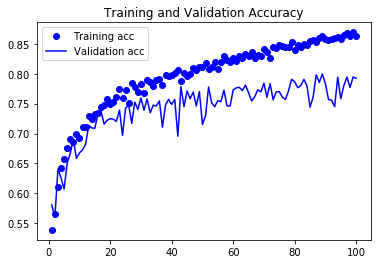

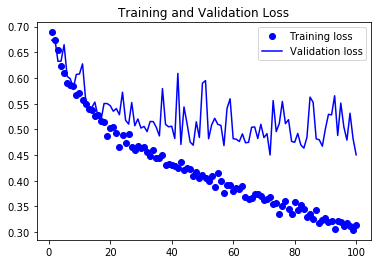

In [21]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.show()